In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/chronic_kidney_disease.csv',header=None,names=['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','class'])

In [3]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.01,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wc      400 non-null    object
 17  rc      400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [5]:
df = df.replace('?',np.nan)
df.head()
df = df.dropna(axis=0)

In [6]:
cols = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

In [7]:
df[cols] = df[cols].apply(pd.to_numeric,errors='coerce',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    float64
 1   bp      158 non-null    float64
 2   sg      158 non-null    float64
 3   al      158 non-null    float64
 4   su      158 non-null    float64
 5   rbc     158 non-null    object 
 6   pc      158 non-null    object 
 7   pcc     158 non-null    object 
 8   ba      158 non-null    object 
 9   bgr     158 non-null    float64
 10  bu      158 non-null    float64
 11  sc      158 non-null    float64
 12  sod     158 non-null    float64
 13  pot     158 non-null    float64
 14  hemo    158 non-null    float64
 15  pcv     158 non-null    float64
 16  wc      158 non-null    float64
 17  rc      158 non-null    float64
 18  htn     158 non-null    object 
 19  dm      158 non-null    object 
 20  cad     158 non-null    object 
 21  appet   158 non-null    object 
 22  pe

In [8]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.01,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.02,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.01,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.01,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.02,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd


In [9]:
df.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [10]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
categorical_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

In [11]:
X = df.drop(columns='class',axis=1)
y = df['class']

In [12]:
y.unique()

array(['ckd', 'notckd'], dtype=object)

In [13]:
categorical_cols[:-1]

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [14]:
X = pd.get_dummies(data=X,columns=categorical_cols[:-1],drop_first=True)
X.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
3,48.0,70.0,1.01,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
9,53.0,90.0,1.02,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,0,0,1,0,1,1,0,1,0,1
11,63.0,70.0,1.01,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,0,0,1,0,1,1,0,1,1,0
14,68.0,80.0,1.01,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,1,0,1,1,1,1,1,1,1,0
20,61.0,80.0,1.02,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0,0,0,0,1,1,1,1,1,1


In [15]:
occ = y.value_counts()
occ

notckd    115
ckd        43
Name: class, dtype: int64

In [16]:
y = y.replace('ckd',0)
y = y.replace('notckd',1)

In [17]:
y.tail()

395    1
396    1
397    1
398    1
399    1
Name: class, dtype: int64

In [18]:
# EDA
y.value_counts()

1    115
0     43
Name: class, dtype: int64

In [19]:
df2 = df.dropna(axis=0)
df2['class'].value_counts()

notckd    115
ckd        43
Name: class, dtype: int64

In [20]:
corr_df = df2.corr()

In [21]:
corr_df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.079712,-0.269735,0.253380,0.207711,0.301915,0.190636,0.189721,-0.102933,0.006866,-0.245645,-0.235116,0.153132,-0.242235
bp,0.079712,1.000000,-0.137800,0.322507,0.243828,0.190113,0.316287,0.386551,-0.224710,0.127801,-0.282365,-0.353504,0.008274,-0.228533
sg,-0.269735,-0.137800,1.000000,-0.576760,-0.384232,-0.494641,-0.450224,-0.451523,0.445680,-0.023945,0.575271,0.574903,-0.267671,0.549574
al,0.253380,0.322507,-0.576760,1.000000,0.521448,0.518123,0.661940,0.702889,-0.599334,0.209492,-0.784745,-0.775528,0.314574,-0.640099
su,0.207711,0.243828,-0.384232,0.521448,1.000000,0.730050,0.312259,0.347196,-0.242491,0.271954,-0.385511,-0.404821,0.201000,-0.377726
bgr,0.301915,0.190113,-0.494641,0.518123,0.730050,1.000000,0.326496,0.331284,-0.284968,0.102226,-0.434158,-0.443818,0.212093,-0.418085
bu,0.190636,0.316287,-0.450224,0.661940,0.312259,0.326496,1.000000,0.896094,-0.492778,0.245427,-0.712196,-0.706582,0.128961,-0.621456
sc,0.189721,0.386551,-0.451523,0.702889,0.347196,0.331284,0.896094,1.000000,-0.532575,0.141896,-0.723937,-0.726187,0.123953,-0.639021
sod,-0.102933,-0.224710,0.445680,-0.599334,-0.242491,-0.284968,-0.492778,-0.532575,1.000000,-0.051037,0.583001,0.570045,-0.176238,0.465125
pot,0.006866,0.127801,-0.023945,0.209492,0.271954,0.102226,0.245427,0.141896,-0.051037,1.000000,-0.192100,-0.213488,-0.107559,-0.193783


In [22]:
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [23]:
# mask

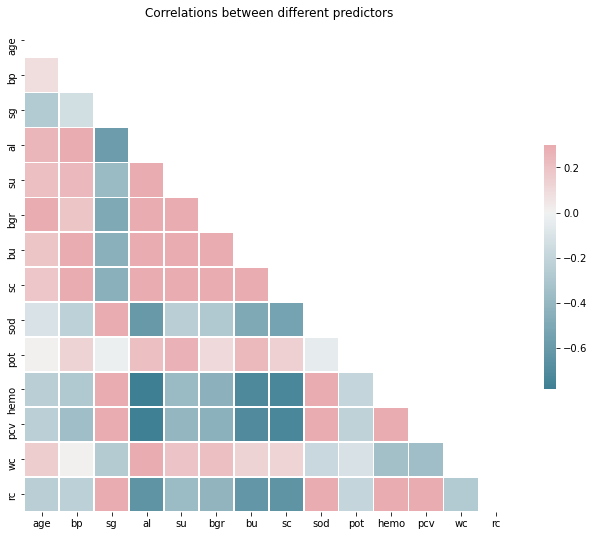

In [24]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5})
plt.title('Correlations between different predictors')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=44)

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [27]:
x_train.shape

(105, 24)

In [28]:
y_train.value_counts()

1    73
0    32
Name: class, dtype: int64

In [29]:
print(df['dm'].value_counts(dropna=False))

no     130
yes     28
Name: dm, dtype: int64


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(x_train.values, y_train.values)

KNeighborsClassifier(n_neighbors=1)

In [32]:
pred = knn.predict(x_test)

In [33]:
print(confusion_matrix(y_test,pred))

[[ 8  3]
 [ 1 41]]


In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.93      0.98      0.95        42

    accuracy                           0.92        53
   macro avg       0.91      0.85      0.88        53
weighted avg       0.92      0.92      0.92        53



In [35]:
accuracy_score( y_test,pred)

0.9245283018867925